<a href="https://colab.research.google.com/github/emilyhasson/STAT-480/blob/main/02b_pandas_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview 

Within this notebook, we focus on establishing a workflow for ingesting data to cleaning data using Pandas! 

For help with Pandas, we recommend looking at: 

- [Pandas Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [Pandas API Reference](https://pandas.pydata.org/docs/reference/index.html#api)

## Diagnostics

In [ ]:
#@title (Hidden) Diagnostic Check
import os
import sys
import pandas as pd
import numpy as np
%tensorflow_version 2.x
import tensorflow as tf

print(f"python: {sys.version}")
print(f"pandas: {np.__version__}")
print(f"tensorflow: {tf.__version__}")
# Detect if a GPU is present
gpus = tf.config.list_physical_devices('GPU')

if gpus:
  print(f"GPU Enabled: True")
else:
  print(f"GPU Enabled: False")

try:
  from google.colab import drive
  is_google_colab = True

  print("Notebook is on Google CoLab")
except:
  is_google_colab = False
  print("Notebook is being run locally or through another source.")


python: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
pandas: 1.19.5
tensorflow: 2.7.0
GPU Enabled: False
Notebook is on Google CoLab


## Save a copy of this notebook!!

Before we get started, it is crucially important that you **save a copy of the notebook** to your Google Drive! Please go to: 

```
File -> Save a Copy in Drive
```



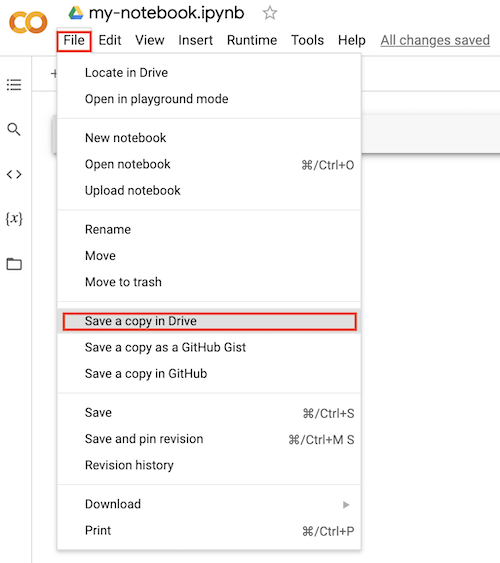

**If you _forget_ to save a copy of the notebook, all of your work will be lost when you close out of Google Colab.**

# Pandas with Real Data

We begin this section by looking at how Pandas can be used to read in real-world data.

## Reading a Data File




Pandas has many ways to ingest or read in data. Each read method is prefixed with `pd.read_*()`, where `*` denotes the file format. Moreover, Pandas does offer the ability to export data to common file formats with `pd.to_*()` functions.

Some common examples of read methods are as follows: 

| Format Type | Data Description                                                    | Reader                                                                                      | Writer                                                                                    |
|-:-----------|-:-------------------------------------------------------------------|-:-------------------------------------------------------------------------------------------|-:-----------------------------------------------------------------------------------------|
| text        | [CSV](https://en.wikipedia.org/wiki/Comma-separated_values)         | [read_csv](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-read-csv-table)  | [to_csv](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-store-in-csv)    |
| text        | Fixed-WidthTextFile                                                 | [read_fwf](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-fwf-reader)      |                                                                                           |
| text        | [JSON](https://www.json.org/)                                       | [read_json](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-json-reader)    | [to_json](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-json-writer)    |
| text        | [HTML](https://en.wikipedia.org/wiki/HTML)                          | [read_html](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-read-html)      | [to_html](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-html)           |
| text        | [LaTeX](https://en.wikipedia.org/wiki/LaTeX)                        |                                                                                             | [Styler.to_latex](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-latex)  |
| text        | [XML](https://www.w3.org/standards/xml/core)                        | [read_xml](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-read-xml)        | [to_xml](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-xml)             |
| text        | Localclipboard                                                      | [read_clipboard](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-clipboard) | [to_clipboard](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-clipboard) |
| binary      | [MSExcel](https://en.wikipedia.org/wiki/Microsoft_Excel)            | [read_excel](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-excel-reader)  | [to_excel](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-excel-writer)  |
| binary      | [OpenDocument](http://www.opendocumentformat.org/)                  | [read_excel](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-ods)           |                                                                                           |
| binary      | [HDF5Format](https://support.hdfgroup.org/HDF5/whatishdf5.html)     | [read_hdf](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-hdf5)            | [to_hdf](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-hdf5)            |
| binary      | [FeatherFormat](https://github.com/wesm/feather)                    | [read_feather](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-feather)     | [to_feather](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-feather)     |
| binary      | [ParquetFormat](https://parquet.apache.org/)                        | [read_parquet](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-parquet)     | [to_parquet](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-parquet)     |
| binary      | [ORCFormat](https://orc.apache.org/)                                | [read_orc](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-orc)             |                                                                                           |
| binary      | [Stata](https://en.wikipedia.org/wiki/Stata)                        | [read_stata](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-stata-reader)  | [to_stata](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-stata-writer)  |
| binary      | [SAS](https://en.wikipedia.org/wiki/SAS_(software))                 | [read_sas](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-sas-reader)      |                                                                                           |
| binary      | [SPSS](https://en.wikipedia.org/wiki/SPSS)                          | [read_spss](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-spss-reader)    |                                                                                           |
| binary      | [PythonPickleFormat](https://docs.python.org/3/library/pickle.html) | [read_pickle](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-pickle)       | [to_pickle](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-pickle)       |
| SQL         | [SQL](https://en.wikipedia.org/wiki/SQL)                            | [read_sql](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-sql)             | [to_sql](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-sql)             |
| SQL         | [GoogleBigQuery](https://en.wikipedia.org/wiki/BigQuery)            | [read_gbq](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-bigquery)        | [to_gbq](https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html#io-bigquery)        |


The full list can be accessed at: <https://pandas.pydata.org/pandas-docs/dev/user_guide/io.html>

### CSV 

CSV stands for a Comma Separated Value (CSV). Or does it? In the U.S., we usually see CSV files that look like so:

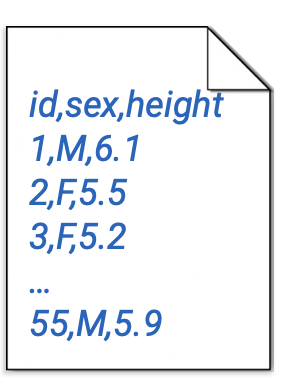

However, in other parts of the world, the CSV format looks like so: 

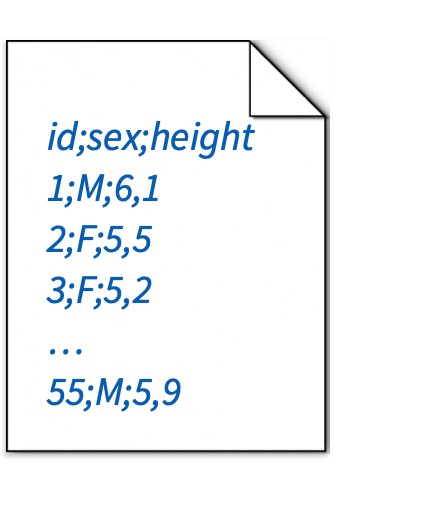

Notice a difference?

The U.S. CSV version uses `,` to separate data whereas the non-U.S. version uses `;`. The reason for this is because of the decimal place being `,` instead of `.` in other parts of the world.

### (Aside) Excel

Many data sets will not be in CSV form or delimited form. Instead, they likely will be found in Excel or in another form. In the event that arises, please note that `pandas` is able to easily read in such data. 



Many analysts will be tempted to immediately read in an excel file using `.read_excel()`. 

In [ ]:
url = "https://coatless.github.io/raw-data/subject_heights.xlsx"
df = pd.read_excel(url, None);


Unfortunately, Excel files may have multiple worksheets embedded in them. Going this route would load all of the spreadsheet information. 


In [ ]:
# See dictionaries read in
df.keys()

dict_keys(['subject_data', 'enrollment'])

Sometimes, only one worksheet is required. So, we opt to first look at the spreadsheet information.

In [ ]:
# Setup an object that points to the excel data
xl_overview = pd.ExcelFile(url)

# See all worksheets
sheets = xl_overview.sheet_names

print(sheets)

['subject_data', 'enrollment']


Next, let's selectively obtain the `subject_data` spreadsheet:

In [ ]:
# Obtain a specific worksheet
my_subject_data = xl_overview.parse('subject_data')  
display(my_subject_data)

,id,sex,height
0,1,M,6.100000
1,2,F,5.500000
2,3,F,5.200000
3,4,M,4.231190
4,5,M,6.228084
5,6,M,4.380299
6,7,F,5.238986
7,8,M,7.545489
8,9,F,4.887789
9,10,F,4.760574


## Data Dictionary

With this being said, let's take a moment and read in a traditional CSV from the UC Irvine ML related to the [adult data set](https://archive.ics.uci.edu/ml/datasets/Adult). Before we read in data, always open the file in a text editor and check that the structure is correct. In the case of the `adult` data, please view the file online by clicking: 

<https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data>

Once we verify the data is accurate, we turn to understanding the information kept within the data frame.


The **codebook** describing the variables and observations contained in `adult` can be viewed under `Data Attributes` header on:

<https://archive.ics.uci.edu/ml/datasets/Adult>

For convenience, we've included the `adult` data code below. a DataFrame with 32,561 observations on the following 15 variables.

- **Age**: Integer
  - Number of years alive
- **WorkClass**: Factor
  - Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt**: Numeric
  - The variable represents the Final Weight, which is more so a sampling weight. See the names file listed in - references for more details.
- **Education**: Factor
  - Highest level of education attained
  - Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, - 10th, Doctorate, 5th-6th, Preschool.
- **EducationNum**: Numeric
  - Number of years of education
- **MaritalStatus**: Factor
  - Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
- **Occupation**: Factor
  - Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **Relationship**: Factor
  - Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **Race**: Factor
  - White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **Sex**: Factor
  - Female, Male
- **CapitalGain**: Integer
  - Income from investment sources, apart from wages/salary
- **CapitalLoss**: Integer
  - Losses from investment sources, apart from wages/salary
- **HoursPerWeek**: Integer
  - Amount of hours worked per week
- **NativeCountry**: Factor
  - Country of origin
  - United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, - South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, - France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, - Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- **Income**: Factor
  - Whether the income greater than $50,000 or not
  - <=50K, >50K <=50K, >50K

## Reading a CSV

Next, we import into Python the data using `.read_csv()`. From our previous discussion, we aim to set `sep = ','` as the values are separated by a comma. Moreover, we specify `header = None` as the data file did not embed variable information, but instead kept it in the **data codebook**. Lastly, we specify common values used to denote missing data.

In [ ]:
# Read in Data
uci_adult_df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
     sep = ",",
     header = None,
     na_values = ['NA','?']
  )

After importing data, it's also a good idea to check to make sure it imported correctly by printing the data.frame. With large data sets, it's better to look at the head and tail compared to printing everything. These observations can be access through member functions `.head()` and `.tail()`. 

The number of observations can be specified by setting `n=...`

In [ ]:
# See the first 3 rows
uci_adult_df.head(n = 3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


Observations from the end of the `DataFrame` can be reached with `.tail(n=...)`

In [ ]:
uci_adult_df.tail(n = 3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Glancing at samples of imported data, the variables are named by index position instead of a meaningful name. I'll need to provide names to the data by using `.columns = ["var1", "var2"]`. More 

## View observations in the data frame

The standard way of viewing objects in Python is to use `print()`. Within a `DataFrame`, that's only one of the options as the amount of observations might be too high. In this case, we're opting to use 

In [ ]:
print(uci_adult_df)

       0                  1       2   ...  12              13      14
0      39          State-gov   77516  ...  40   United-States   <=50K
1      50   Self-emp-not-inc   83311  ...  13   United-States   <=50K
2      38            Private  215646  ...  40   United-States   <=50K
3      53            Private  234721  ...  40   United-States   <=50K
4      28            Private  338409  ...  40            Cuba   <=50K
...    ..                ...     ...  ...  ..             ...     ...
32556  27            Private  257302  ...  38   United-States   <=50K
32557  40            Private  154374  ...  40   United-States    >50K
32558  58            Private  151910  ...  40   United-States   <=50K
32559  22            Private  201490  ...  20   United-States   <=50K
32560  52       Self-emp-inc  287927  ...  40   United-States    >50K

[32561 rows x 15 columns]


In [ ]:
display(uci_adult_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Rename Variables

Unfortunately, the data set that we were given lacked a column header. When data lacks a column header, `pandas` will either read in the first observation as the variable names or denote each column with a numerical index starting from $0$ to $n - 1$. 

We can see a data set's current variable names by using `.columns` attribute.


In [ ]:
uci_adult_df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

We can supply columns with names in this case by specifying an entire list. 

In [ ]:
# Add all column names
uci_adult_df.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]

# Show new column names
uci_adult_df.columns

Index(['Age', 'WorkClass', 'fnlwgt', 'Education', 'EducationNum',
       'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Gender',
       'CapitalGain', 'CapitalLoss', 'HoursPerWeek', 'NativeCountry',
       'Income'],
      dtype='object')

We can verify the column names have been set by running `.head()` or `.tail()` again.

In [ ]:
uci_adult_df.head(n = 3)

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


Once we initialize all column names to a string, we can then use [`.rename()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) to change a specific column. The `.rename()` method needs a mapping that takes the old name and converts it into a new name. For example, we would have: 

```python
df.rename(columns = {"Old_Name": "New_Name"}, inplace = True)
```

Let's temporarily change the `Age` variable's name to `MyAgeToday`. Note, we are not using `inplace = True`, so the value will not persist past the rename statement.

In [ ]:
uci_adult_df.rename(columns = {"Age": "MyAgeToday"}).columns

Index(['MyAgeToday', 'WorkClass', 'fnlwgt', 'Education', 'EducationNum',
       'MaritalStatus', 'Occupation', 'Relationship', 'Race', 'Gender',
       'CapitalGain', 'CapitalLoss', 'HoursPerWeek', 'NativeCountry',
       'Income'],
      dtype='object')

## Reorder Variables

Columns can be moved inside of pandas by specifying a list with the new names present. For example, we have columns:

```python
['a', 'b', 'c']
```

We could re-arrange these columns by: 

```python 
rearranged_df = df[['b', 'c', 'a']]
```


## Summarizing Data

With the data now incorporated, we can perform overarching summary analyzes by using `.describe()`. We opt to include both numerical, categorical, and object-based summaries.

In [ ]:
# See descriptive statistics
uci_adult_df.describe(include="all")

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


## Graphing Data

Frequently, we may be interested in visually seeing distribution information about the data. As a result, `pandas` has built-in methods to faciliate visualizing information.

Histograms are useful for this approach as they focus on continuous variable binning 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4681b4f850>]],
      dtype=object)

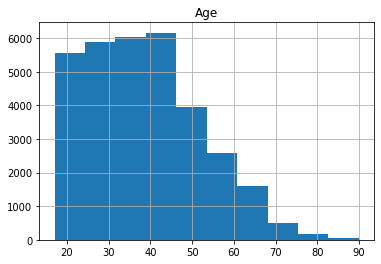

In [ ]:
# Plot a histogram for Age
uci_adult_df.hist('Age')

Note, we can suppress the excess information by adding a `;` to the end of the statement. 

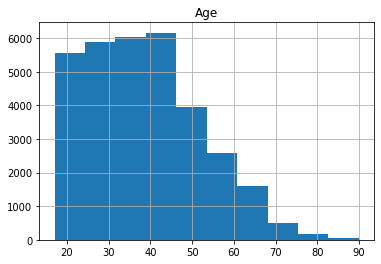

In [ ]:
# Plot a histogram for Age
uci_adult_df.hist('Age');

Boxplot's are useful for showing a continuous variable split by discrete categories.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


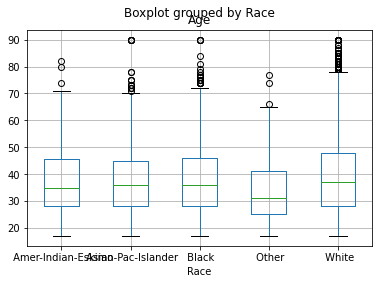

In [ ]:
uci_adult_df.boxplot('Age', by = 'Race');

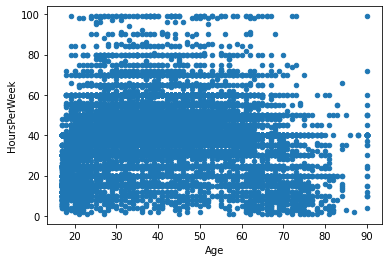

In [ ]:
uci_adult_df.plot.scatter('Age', 'HoursPerWeek');

### Your Turn: Plotting

Generate a histogram plot of `HoursPerWeek`


In [ ]:
# Plot histogram of `HoursPerWeek`


## Drop Columns

Sometimes a column doesn't make sense to belong to a `DataFrame`. The column can be removed using `.drop()`.

**Note:** We're using `inplace=True` to avoid making a copy and needing to re-save it back into the original `DataFrame` object.

In [ ]:
print("Variables before drop:")
print(uci_adult_df.columns[0:4])

# Drop a variable inplace
uci_adult_df.drop('fnlwgt', 1, inplace=True)

print("Variables after drop:")
print(uci_adult_df.columns[0:4])

Variables before drop:
Index(['Age', 'WorkClass', 'fnlwgt', 'Education'], dtype='object')
Variables after drop:
Index(['Age', 'WorkClass', 'Education', 'EducationNum'], dtype='object')


## Add Columns

Sometimes we may wish to derive a new variable from the data. Derived variables exist in many forms, a few common instances are:

- Computing new quantities (e.g. overall wage when given hours worked and pay rate).
- **Discretize** continuous values into a discrete scale (e.g. 100 - 90 -> A, 80 - 89 -> B)
- **Normalize** continuous values by applying a linear transformation to scale and center data.

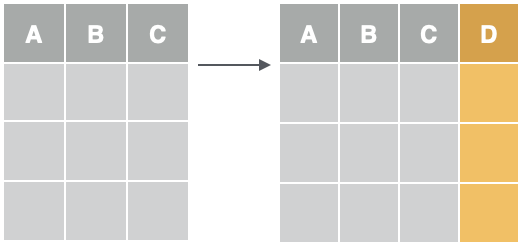

For example, we could create a "HighEarnerWorker" variable that quantifies the amount earned based on the captial gain multiplied by hours per week.

In [ ]:
uci_adult_df['HighEarnerWorker'] = uci_adult_df.HoursPerWeek * uci_adult_df.CapitalGain

Alternatively, we can use a lambda function to handle the mapping. Lambda functions are anonymous functions meant for single-use. They take the form of:

```python
(lambda parameters: expression)(input)
```


As an example, consider the squaring operation, we could use: $$f(x) = x^2$$

In [ ]:
(lambda x: x**2)(4)

16

In [ ]:
(lambda x: x**2)(8)

64

The equivalent function definition would be: 


In [ ]:
def square_value(x):
  return x**2

square_value(8)

64

If we find ourselves frequently using the squaring lambda function, we can quickly promote it by assigning a name. 


In [ ]:
square_value = (lambda x: x**2)
square_value(8)

64

Returning to adding a `HighEarnerWorker`, we could use the `lambda` function alongside of `.assign()` method. 

In [ ]:
uci_adult_df.assign(HighEarnerWorker = lambda df: df.HoursPerWeek * df.CapitalGain)

,Age,WorkClass,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income,HighEarnerWorker
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,86960
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,0
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


### Your Turn: Understanding Lambdas

Previously, we established two version for adding a column:

```python 
# Direct manipulation 
uci_adult_df['HighEarnerWorker'] = uci_adult_df.HoursPerWeek*uci_adult_df.CapitalGain

# Lambda function equivalent 
uci_adult_df.assign(HighEarnerWorker=lambda df: df.HoursPerWeek*df.CapitalGain)
```

What benefit does the `lambda` version provided compared to a direct modification? 

--- 

lambda functions are better for complex manipulations

--- 

### Scaling/Normalizing Data 

When thinking about data, realize that each data point may have vastly different magnitudes/sizes. As a result, it sometimes is a good idea to normalize information into a standard form to help make a decision. For instance, what is a better deal? Getting a 4 dollar Iced Mocha (down from 6.42) or getting $500 dollars off a new computer that costs 1,500 dollars? 

Enter the Z-Score, which aims to help with normalizing values:

$$z = \frac{x - \mu}{\sigma}$$

To calculate the Z-Score you need to calculate:

- the mean($\mu$)

$$\mu = \bar{x} = \frac{x_1+x_2+\cdots +x_n}{n}$$

- the standard deviation ($\sigma$)

$$\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2}, \text{ where } \mu = \frac{1}{n} \sum_{i=1}^n x_i$$



In essence, the z-score reduces the size of the numbers by centering and scaling. 

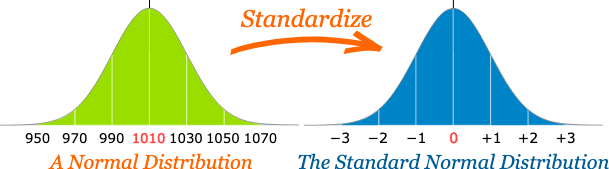

In our case, workers that work 40 hours will be near zero as that is where the mean resides. Workers with a z-score above 0 will be above average, and below zero is below average. Any z-score that is above 3 or below -3 is likely an outlier in the data. 

In [ ]:
from scipy.stats import zscore
uci_adult_df['HoursPerWeekZScore'] = zscore(uci_adult_df['HoursPerWeek'])
display(uci_adult_df[['HoursPerWeek', 'HoursPerWeekZScore']])

,HoursPerWeek,HoursPerWeekZScore
0,40,-0.035429
1,13,-2.222153
2,40,-0.035429
3,40,-0.035429
4,40,-0.035429
...,...,...
32556,38,-0.197409
32557,40,-0.035429
32558,40,-0.035429
32559,20,-1.655225


#### Your Turn: Min-max

Instead of normalizing the `HoursPerWeek` by a Z-score, let's aim to use the min-max technique given by: 

$$x' = \frac{x - \text{min}(x)}{\text{max}(x)-\text{min}(x)}$$

Recall that we can access a specific variable with `df['variable']` and we can obtain summary information using `.mean()`, `.min()`, .`max()`, and so on. 

Create a new derived variable called `HoursPerWeekMinMax`. Display the original `HoursPerWeek`, z-transformed `HoursPerWeek`, and min-max transformed `HoursPerWeekMinMax` together.


In [ ]:
## Code here

With the new variables in hand, perform a numerical summary on the columns.

In [ ]:
## Code here 

How does the summary output change? 

----

answer

---

### Discretizing Data

When working with continuous data, we may sometimes wish to reduce the data into a set of categories. The process of applying thresholds to continuous data is called **discretizing**. For example, within the medical field you may receive a test where your blood pressure is 110 and be categorized as having "Normal" blood pressure.

Category | Numerical Result
----|----
Normal |	Less Than 120
Elevated |	120 – 129	
High Blood Pressure (Hypertension) Stage 1 |	130 – 139
High Blood Pressure (Hypertension) Stage 2 |	140 - 180	

We can automate this process using either a set of `if-else if-else` statements or use [`.cut(variable, [intervals])`](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) method built-in to Pandas.


In [ ]:
health_data = pd.DataFrame({
    "bloodpressure": [110, 115, 139, 140, 145]
})
display(health_data)

,bloodpressure
0,110
1,115
2,139
3,140
4,145


Reading from the table, we would construct the following thresholds:

In [ ]:
health_data['category'] = pd.cut(health_data['bloodpressure'], [0, 120, 130, 140, 180, np.inf])
display(health_data)

,bloodpressure,category
0,110,"(0.0, 120.0]"
1,115,"(0.0, 120.0]"
2,139,"(130.0, 140.0]"
3,140,"(130.0, 140.0]"
4,145,"(140.0, 180.0]"


Instead of viewing thresholds, the category should likely match with how a doctor would read the result. That is, we need to apply the five distinct blood pressure classes.

In [ ]:
health_data['category'] = pd.cut(
    health_data['bloodpressure'], 
    bins = [0, 120, 130, 140, 180, np.inf], 
    labels = ["Normal", "Elevated", "Stage 1", "Stage 2", "Unknown"])
display(health_data)

,bloodpressure,category
0,110,Normal
1,115,Normal
2,139,Stage 1
3,140,Stage 1
4,145,Stage 2


#### Your Turn: Discretizing Age for Advertisers

In advertising, we frequently have campaigns targeted toward the following age groups: 

- 18-24
- 25-34
- 35-44
- 45-54
- 55-64
- 65+

Using the `Age` column in `uci_adult_df`, create a new derived variable called `AgeGroups`.

In [ ]:
# Code here

## Missingness

The data set we are working with is relatively "clean". That is, all information is accounted for across each row and column. Nothing is amiss.

In practice, data that is "complete" is a rarity to have. In fact, we often have data that is "incomplete" or contains missing values. Two instances of this behavior come into mind:

1. missing is properly denoted, and
2. coded as present, but really missing.

As we discussed previously, data that is missing is denoted by `NaN` using `NumPy`'s `np.nan`. In other languages, you may see a missing value denoted by either `NA` or `NULL`.


In [ ]:
import numpy as np 

np.nan

nan

This value is special in the sense that any operation on a missing value will yield a new missing value. Take for instance:

In [ ]:
1 + np.nan

nan

In [ ]:
0 * np.nan

nan

Thankfully, Pandas has pre-built methods that take into account variables that contain missing values. For instance, let's consider two series: 1. complete and 2. incomplete

In [ ]:
import pandas as pd 

full_data = pd.Series([1, 2, 3, 4])
missing_data = pd.Series([np.nan, 2,3 , 4])
              #                # ^^^^^

print(f"Complete Data:\n{full_data}\n")
print(f"Incomplete Data:\n{missing_data}")

Complete Data:
0    1
1    2
2    3
3    4
dtype: int64

Incomplete Data:
0    NaN
1    2.0
2    3.0
3    4.0
dtype: float64


Performing the aggregations with series frames yields notably different results:

In [ ]:
full_data.sum(), full_data.min(), full_data.max()

(10, 1, 4)

In [ ]:
missing_data.sum(), missing_data.min(), missing_data.max()

(9.0, 2.0, 4.0)

### Methods for Missing Data

df.method() | description
--- | ----
.dropna() | Drop missing observations
.dropna(how='all') | Drop observations where all cells is NA
.dropna(axis=1, how='all') | Drop column if all the values are missing
.dropna(thresh = 5) | Drop rows that contain less than 5 non-missing values
.fillna(0) | Replace missing values with zeros
.isnull()  | True if the value is missing
.notnull() |  True for non-missing values


#### Verify Presence of Missingness

Let's verify the data imported correctly by checking for any [missing values](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html). 


In [ ]:
uci_adult_df.isnull().values.any()

False

This looks great... But, we probably should cause an issue.

For this problem, we introduce NumPy's `np` to insert a `NaN` or "Not-a-Number" value within the `DataFrame`.

In [ ]:
import pandas as pd
import numpy as np

# Create a copy
uci_adult_df_na = uci_adult_df.copy(deep = True)

# Infect with a missing value
uci_adult_df_na.loc[0:1000, ('Age')] = np.nan

We can check our disruptive work by peeking at the "head" of the data set.

In [ ]:
uci_adult_df_na.head(2)

,Age,WorkClass,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income,HighEarnerWorker,HoursPerWeekZScore
0,NaN,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,86960,-0.035429
1,NaN,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,-2.222153


Now, if we re-run the previous code, we should detect a missing value in the data.

In [ ]:
uci_adult_df_na.isnull().values.any()

True

#### Identifying Locations of Missingness

We can peek ahead to tomorrow and use a heatmap from Seaborn to visualize where missing data is located in the dataframe.

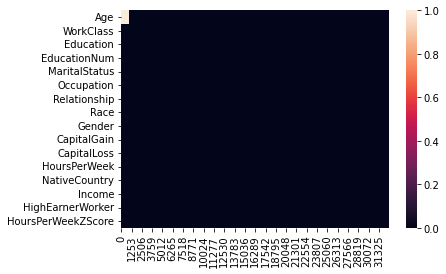

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(uci_adult_df_na.isnull().transpose());

Each row that contains a _single_ missing value is  displayed in yellow next to the variable name.

Moreover, any row with a _single_ missing could be directly subset by going across `axis = 1` (row-wise). 

In [ ]:
uci_adult_df_na[ uci_adult_df_na.isnull().any(axis=1) ].head()

,Age,WorkClass,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income,HighEarnerWorker,HoursPerWeekZScore
0,NaN,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,86960,-0.035429
1,NaN,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,-2.222153
2,NaN,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,-0.035429
3,NaN,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,-0.035429
4,NaN,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,-0.035429


Interestingly enough, missing data has its own patterns. Depending data, it may have one of the following types of missingness:

- Missing Completely At Random (MCAR): indicates that no relationship exists between missing values and any observed values
- Missing At Random (MAR): indicates a relationship exists between missing values and recorded values that can be inferred.
- Missing Not At Random (MNAR): indicates a relationship exists between the value of the missing data.

Let's take an aside and consider an IQ Test

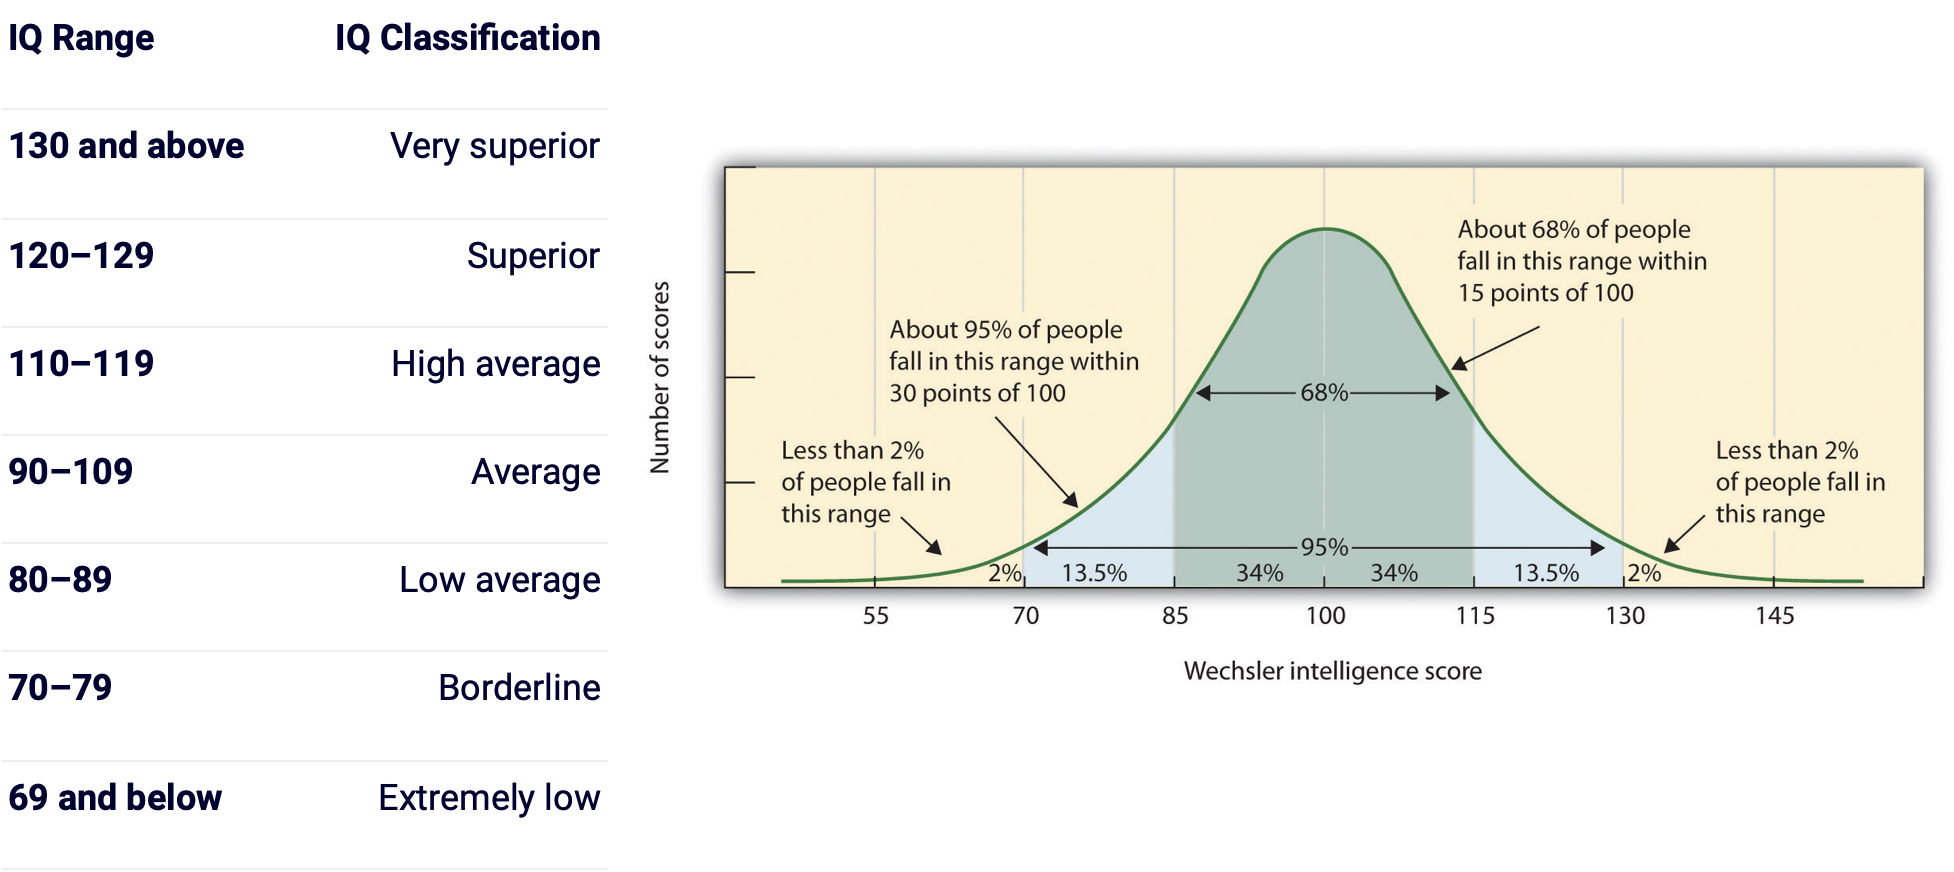

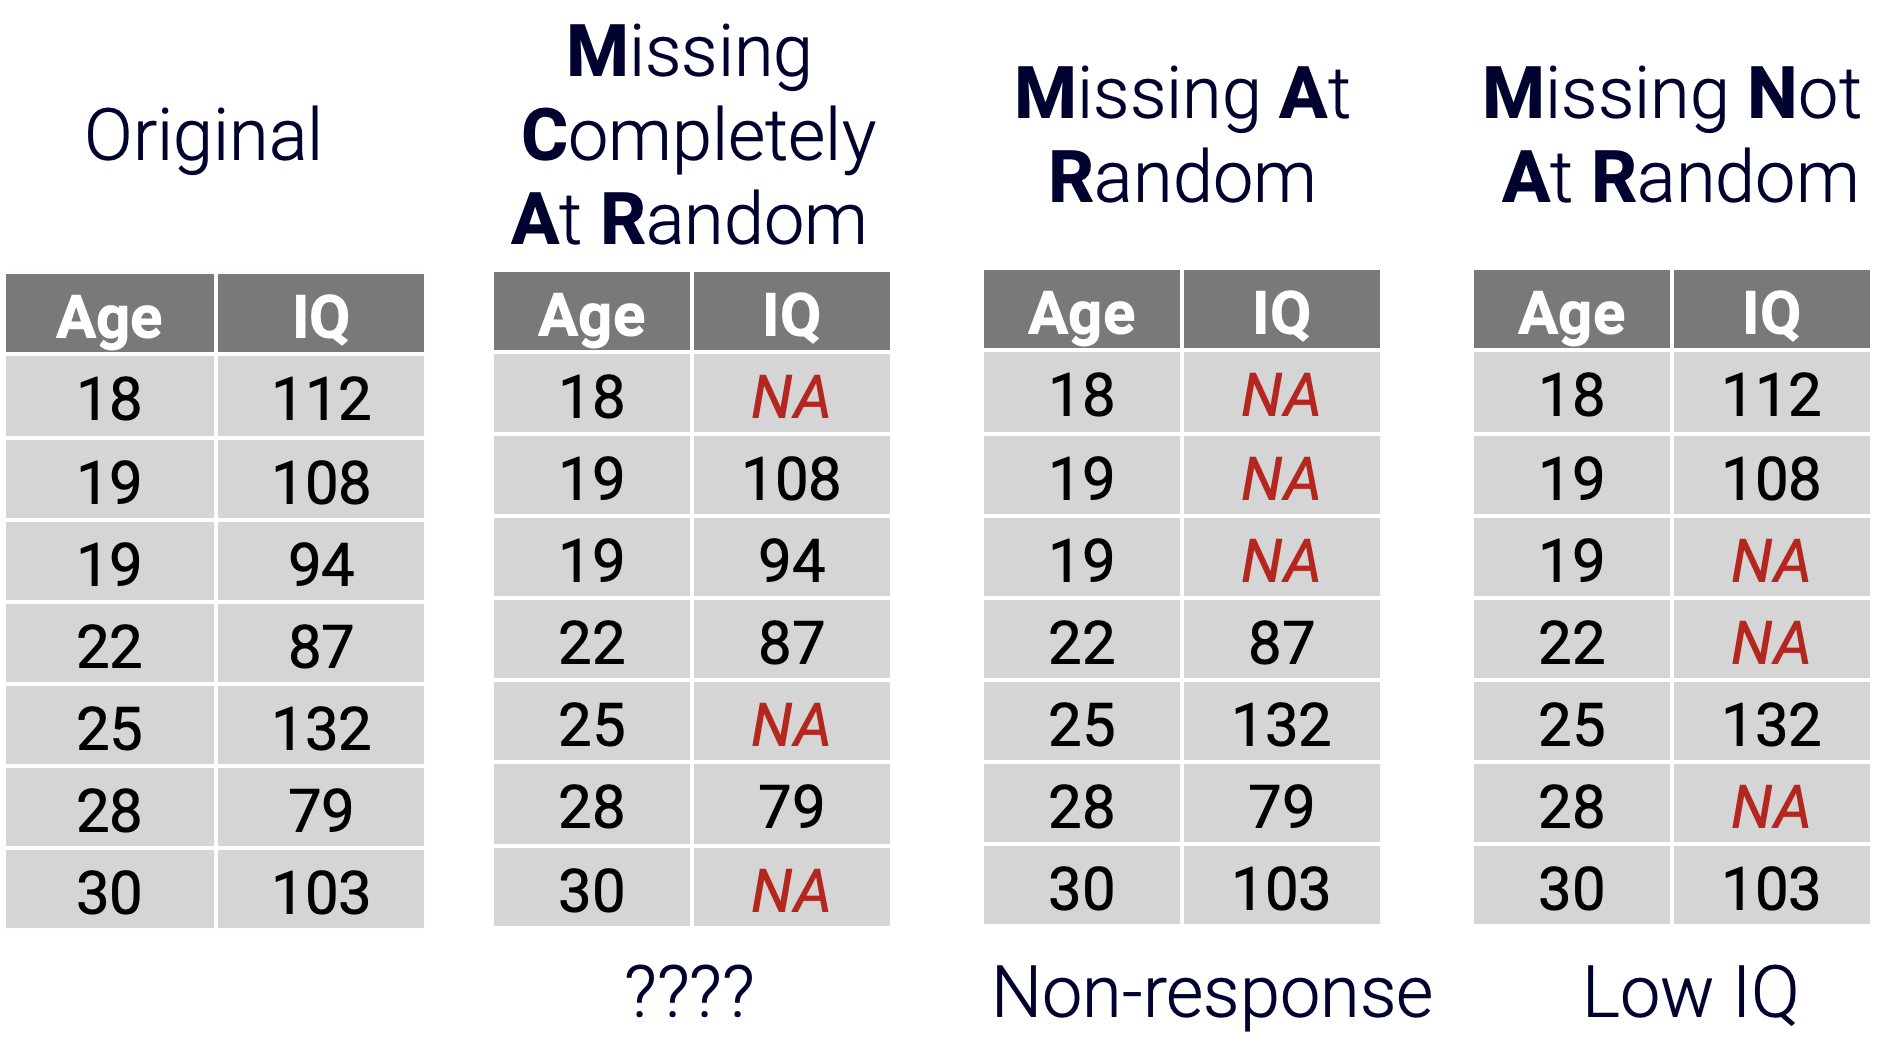

## Imputations 

One way to address this is to imput values within the data. Depending on the problem, there are a variety of imputation strategies present. 

Common approaches are:

- List-wise deletion: Removing any row with missing information
- Single Imputation: 
  - Median Imputation: Substitute NA value with **Median** of column
  - Mean Imputation: Substitute NA value with **Mean** of column
- Multiple Imputation: Create several different imputed data sets and, then, combine the results from each of them to obtain the final imputation. 


List-wise deletion is the most straightforward approach at the cost of losing data if present.

In [ ]:
uci_adult_df_na.dropna(axis='rows', inplace = False).head()

,Age,WorkClass,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income,HighEarnerWorker,HoursPerWeekZScore
1001,50.0,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,65,United-States,>50K,0,1.989315
1002,38.0,State-gov,HS-grad,9,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K,0,-0.035429
1003,23.0,Local-gov,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,60,United-States,<=50K,0,1.584366
1004,31.0,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K,0,-1.979184
1005,58.0,Private,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K,0,-0.035429


For our data set, we'll do a one-pass approach using median imputation.

In [ ]:
# Compute the median
age_median = uci_adult_df_na['Age'].median()

# Replace NA values with the median value for Age.
uci_adult_df_na['Age'] = uci_adult_df_na['Age'].fillna(age_median)

# Verify it's gone again
uci_adult_df_na.isnull().values.any()

False

## Splitting Data

The standard practice when modeling is to split a single data set into two:

- **Training**: Data that should be used to train the model.
- **Testing**: Data that should be used to evaluate the predictions made by the trained model.

Usually, the percentage is about an 80/20% split with 80% going to training and 20% going to testing. 

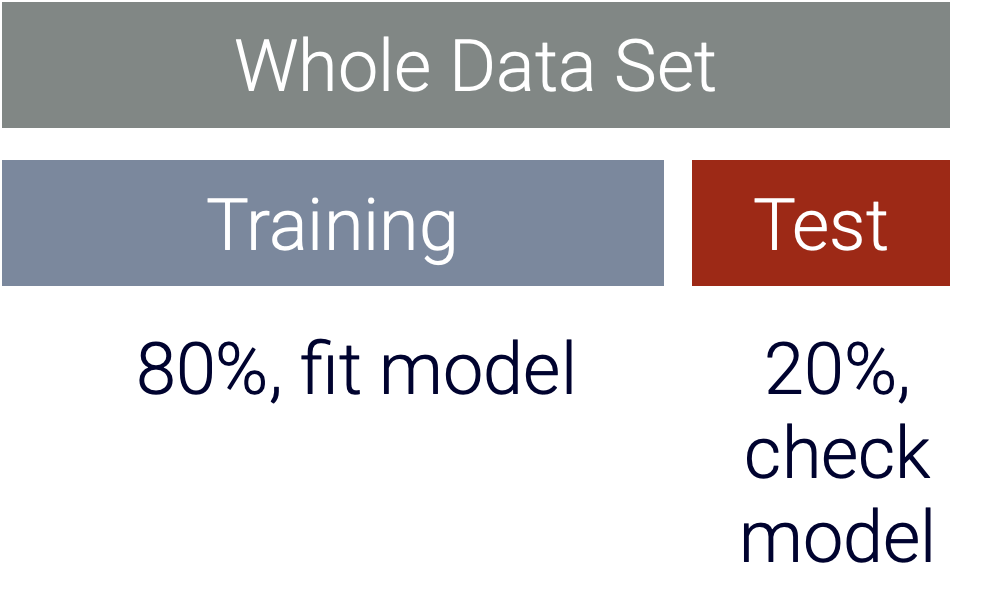

More recently, there has been the need to introduce a third partition for data called: **Development (dev)** or **Validation**. Unlike **testing**, the **development** data is what should be used to test the model in-between training sessions and **Testing** is then held until the very end. 

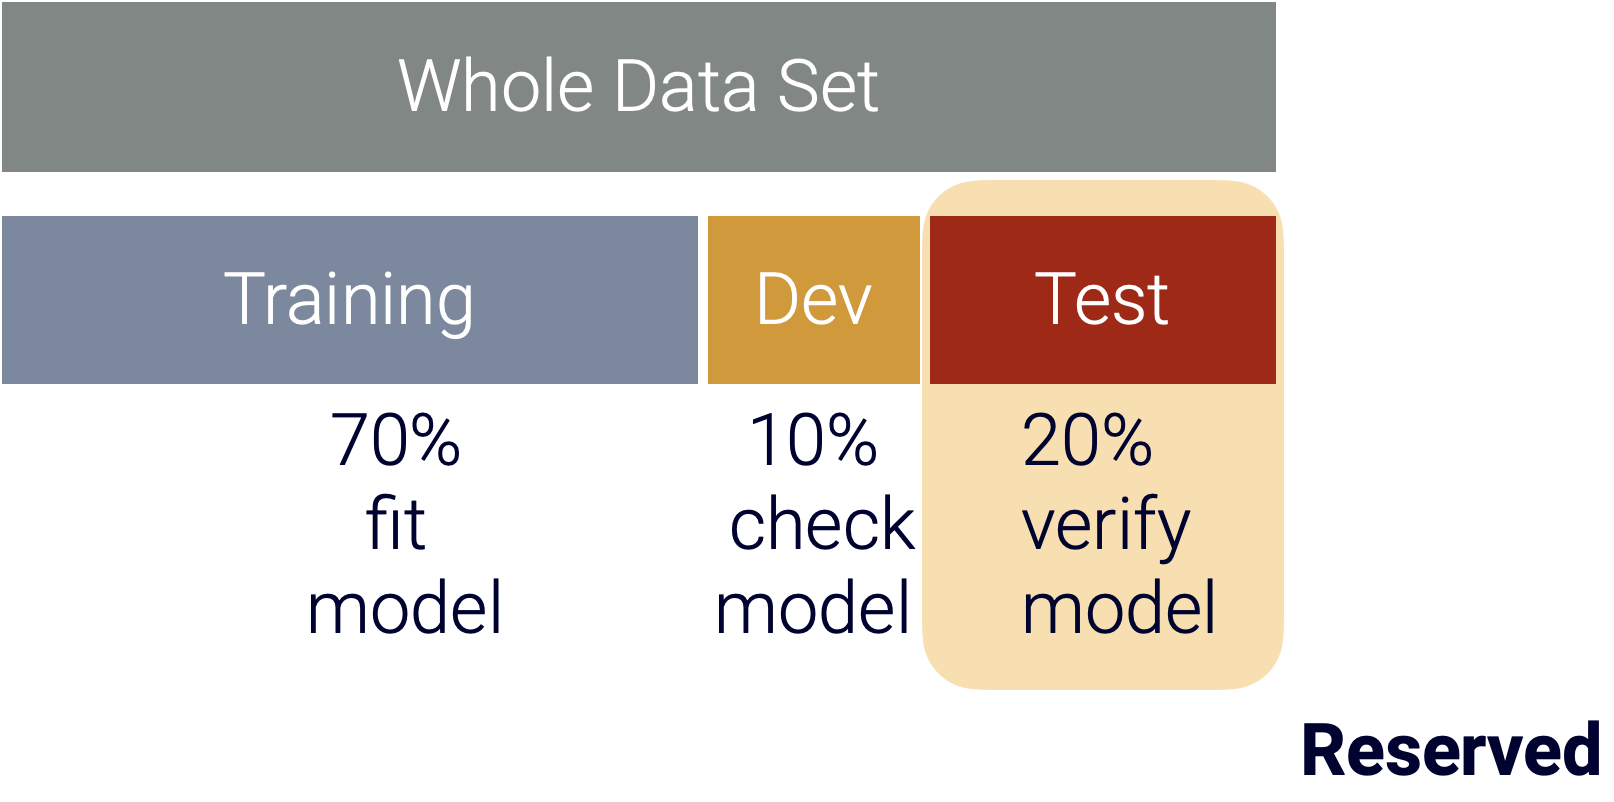

For this problem, we introduce NumPy `np` to handle random number generation associated with permutations.

In [ ]:
import pandas as pd
import numpy as np

# Shuffle observations within the data set
# to avoid correlation between related rows
uci_adult_df = uci_adult_df.reindex(
    np.random.permutation(uci_adult_df.index)
  )

# Randomly generate indices so that the data
# is split into 80/20
nobs_df = len(uci_adult_df)
train_idx = np.random.rand(nobs_df) < 0.8

# Split the data
training_df = uci_adult_df[train_idx]
testing_df = uci_adult_df[~train_idx]

# Display split results
nobs_training = len(training_df)
nobs_testing = len(testing_df)
print(f"Observations in Training DataFrame: {nobs_training} ({nobs_training/nobs_df})")
print(f"Observations in Testing DataFrame: {nobs_testing} ({nobs_testing/nobs_df})")


Observations in Training DataFrame: 25959 (0.7972420994441203)
Observations in Testing DataFrame: 6602 (0.20275790055587972)


We can replicate the same approach in a less verbose way by adding in an additional dependency on another package `sklearn`.

From here, the [`train_test_split()` function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) can be used to achieve a train/test split on the data.

In [ ]:
# Load train_test_split function in the model_selection module for sklearn
from sklearn.model_selection import train_test_split

# Split the data with 20% in testing and 80% in training.
train, test = train_test_split(uci_adult_df, test_size=0.2)


## Aggregating by Groups


Many times will seek to obtain summary information on a per-group basis. For instance, we want to know the average hours worked for each age in the data set.

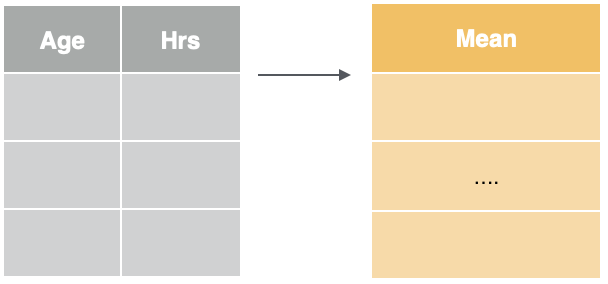

In [ ]:
hrs_by_age_mean = uci_adult_df.groupby('Age')['HoursPerWeek'].mean()
print(hrs_by_age_mean)

Age
17    21.367089
18    25.912727
19    30.678371
20    32.280212
21    34.034722
        ...    
85    29.333333
86    40.000000
87     2.000000
88    40.000000
90    36.813953
Name: HoursPerWeek, Length: 73, dtype: float64


Sometimes, it's useful to have the information in dictionary form. To obtain, use `.to_dict()`.

In [ ]:
hrs_by_age_mean.to_dict()

{17: 21.367088607594937,
 18: 25.912727272727274,
 19: 30.678370786516854,
 20: 32.28021248339974,
 21: 34.03472222222222,
 22: 35.17124183006536,
 23: 36.71835803876853,
 24: 39.08897243107769,
 25: 40.00713436385256,
 26: 41.06496815286624,
 27: 42.039520958083834,
 28: 42.02768166089965,
 29: 42.36531365313653,
 30: 42.167247386759584,
 31: 42.877252252252255,
 32: 42.878019323671495,
 33: 42.965714285714284,
 34: 42.93792325056433,
 35: 43.90867579908676,
 36: 43.25723830734967,
 37: 43.70629370629371,
 38: 44.05320435308344,
 39: 43.693627450980394,
 40: 42.4382871536524,
 41: 43.10519801980198,
 42: 43.212820512820514,
 43: 43.250649350649354,
 44: 44.129834254143645,
 45: 43.294277929155314,
 46: 42.915875169606515,
 47: 43.18785310734463,
 48: 43.21178637200737,
 49: 43.75389948006932,
 50: 43.95348837209303,
 51: 43.28403361344538,
 52: 42.98953974895397,
 53: 43.303879310344826,
 54: 42.58072289156627,
 55: 42.279236276849645,
 56: 42.060109289617486,
 57: 42.460893854748605,

## Custom Aggregations

Additional aggregation information can be obtain by using `.agg()` and supplying summary functions.

In [ ]:
hrs_by_age_overview = uci_adult_df.groupby('Age')['HoursPerWeek'].agg(['mean', 'std', 'count'])
display(hrs_by_age_overview)

,mean,std,count
Age,,,
17,21.367089,10.021015,395
18,25.912727,11.733362,550
19,30.678371,12.119154,712
20,32.280212,11.726599,753
21,34.034722,12.040389,720
...,...,...,...
85,29.333333,24.006943,3
86,40.000000,NaN,1
87,2.000000,NaN,1


# Your Turn: Analyzing Student Grade Data

Under this exercise, we will explore the "Teachers Ranked As Excellent" data
at UIUC from Fall 1993 to Summer 2020 as compiled by 
[Wade Fagen-Ulmschneider](http://waf.cs.illinois.edu/).
The data is available from:

<https://raw.githubusercontent.com/wadefagen/datasets/master/teachers-ranked-as-excellent/uiuc-tre-dataset.csv> 

This data has a file extension of **CSV** form. Contained in the data are the following variables:

- `term`: Two letter semester code (`sp`, `su`, `fa`, or `wi`) followed by a four digit year.
    - Examples: `sp2017`, `fa2013`, `su2012`.
- `unit`: The CITL-supplied headers for the unit teaching the course.
    - Examples: `ACCOUNTANCY`, `SOCIAL WORK`, `LINGUISTICS`, `NUCLEAR, PLASMA & RAD. ENGR.`
- `lname`: The last name of the teacher.
    - Examples: `FAGEN-ULMSCHNEIDER`, `FLANAGAN`, `FLECK`
- `fname`: The first letter of the first name of the teacher.
    - Examples: `W`, `K`, `M`
- `role`: `Instructor` or `TA`
- `ranking`: `Excellent` or `Outstanding`
- `course`: The course the teacher was ranked as excellent.  If no course is given, the `course` field is set to `?` (this includes cases when the raw data lists the course as `0`, `000`, or `999`).
    - Examples: `199`, `225`, `560`, `?`




## a: Importing Data via URL 

Import into _Python_ the data in `uiuc-tre-dataset.csv`. 

**Note:** As `course` denotes a value that is
_not_ `NaN`, which is how _Python_ represents missing values, you must use the parameter 
`na_values = ['NA','?'] ` during the import with pandas.

In [ ]:
# Code

## b: Data Characteristics 

First, obtain the overarching data frame information. 
Second, obtain the numerical summary of the data. 

Given both of the outputs, which variable output is different from the rest? What might have caused this?

Data set overview:

In [ ]:
# Code

Numerical summary:

In [ ]:
# Code

Variable difference explanation:

## c: Missing Value Check

1. Verify that `course` has `NaN` values. 
2. Perform a list-wise deletion to remove rows with `NaN` values.


In [ ]:
# Code

## d: Tabulating Rank Appearances

1. Search for the following professor names in the list of excellency: `Douglas`, `Simpson`, and `Dalpiaz`. 
  - _Hint_: Search the `lname` variable in the `DataFrame`.
  - _Hint_: Make sure to search the _last name_ with capital letters.

2. Compute the total number of times they appeared in the excellency ratings.



In [ ]:
# Code

## e: Deleting a Variable

Drop the `fname` column in-place.

In [ ]:
# Code here

## f: Creating two data sets.

Split the data into a training and testing data set. The weight should be 65% training and 35% testing.

In [ ]:
# Code here

## g: Visualize Barplot

Create a bar plot on `role` to see the counts of how often a `Instructor` or `TA` make the list.

First obtain a count by grouping `role`. 

In [ ]:
# Code here

# Your Turn: Pima Indians Diabetes Database

The National Institute of Diabetes and Digestive and Kidney Diseases conducted a study on 768 adult female Pima Indians living near Phoenix.

The dataset contains the following variables

- **pregnant:** Number of times pregnant
- **glucose:** Plasma glucose concentration at 2 hours in an oral glucose tolerance test
- **diastolic:** Diastolic blood pressure (mm Hg)
- **triceps:** Triceps skin fold thickness (mm)
- **insulin:** 2-Hour serum insulin (mu U/ml)
- **bmi:** Body mass index (weight in kg/(height in metres squared))
- **diabetes:** Diabetes pedigree function
- **age:** Age (years)
- **test:** test whether the patient shows signs of diabetes coded:
  - 0 if negative
  - 1 if positive

## 0: Import Pima from Disk

To allow you to practice importing files natively, we've downloaded the `pima.csv` file to disk. 

In [ ]:
# Download data using bash command
!wget -q https://coatless.github.io/raw-data/pima.csv


The file can be found at: 

```
/content/pima.csv
```

We can verify the file location by looking at our file system:

In [ ]:
# Where we are on the file system / working directory
!pwd 

!echo " "

# View all files in our working directory
!ls -la 

/content
 
total 40
drwxr-xr-x 1 root root  4096 Jan 27 14:52 .
drwxr-xr-x 1 root root  4096 Jan 27 14:52 ..
drwxr-xr-x 4 root root  4096 Jan  7 14:33 .config
-rw-r--r-- 1 root root 23092 Jan 20 04:36 pima.csv
drwxr-xr-x 1 root root  4096 Jan  7 14:33 sample_data


On Colab, you can click the "File icon" on the left-hand side to open the File menu to verify the file is present in a file explorer.

With this being said, please read in the `pima.csv` data file into a Pandas DataFrame called `pima`. 

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None  

## Code here


## a: Data Set Overview

Perform a traditional summary analysis on the `pima` data set.



In [ ]:
## Code here

Comment on the minimum values found in each variable. Do these values 
make sense?

_Hint:_ Look at the description of each variable in the above code book.
You may wish to gain domain knowledge by doing a quick
google search about Diabetes, Digestive, and Kidney Diseases. 
**Note:** A google search is not a substitute for going to a medical professional.


--- 

answer

---

## b: Creating a Missing Indicator Coding Function

Create a function called `code_na` that recodes a specific value in a data set to be `NA`.

- **Inputs:** Accepts two parameters
     - a _vector_
     - and a _value_ to search for in the _vector_.
- **Returns:** Modified version of the vector containing `NA` values where
  the specific value is detected.


In [ ]:
## Code here

## c: Analyzing Missingness


Make a deep copy of the `pima` and save it as `na_pima`. 

**Remark:** By making a copy, we can easily go back to the original data set if
anything goes wrong by simply re-running the import code chunk.


In [ ]:
## Code here

Recode the "odd" value found in **(a)** to denote `NA` using the function developed in **(b)** and show the summary of the updated version of the `pima` data.

In [ ]:
## Code here

## d: Creating a Median Imputation Function

Create a function called `impute_median` that replaces all `NA` values in the vector with the median. 

- **Inputs:** Accepts a vector.
- **Returns:** Modified version of the vector that replaces the `NA` values
  with the median for the vector.

_Note:_ This is what we call a "median [imputation](https://en.wikipedia.org/wiki/Imputation_(statistics))", 
    where we are replacing missing values with the median of the data to 
    shift from "incomplete cases" to "complete cases." You will introduce 
    _some_ bias under this formulation.

In [ ]:
# code here

## e: Performing a Median Imputation

Create a data copy of `na_pima` called `imputed_pima` to store imputation
results and, then, for variables identified in **(a)**:

- impute the median into `imputed_pima` using the function developed in **(d)**, and 
- show the summary of the updated version of the `imputed_pima` data.


Comment as to how the summary changed from **(a)** and **(d)**; and
why is it good practice to first denote the missing values and then 
fill them? 


----

answer 

---
